In [1]:
import matplotlib.pyplot as plt
imkwargs = dict(extent=(-2.5, 2.5, -2.5, 2.5), origin='lower') #left, right, bottom, top


In [2]:
#!/usr/bin/env python
# coding: utf-8


import torch, datetime, click

import swyft
from utils import *

DEVICE = 'cuda'


# from swyft.utils import tensor_to_array, array_to_tensor
# from toolz import compose
# from pyrofit.lensing.distributions import get_default_shmf


# @click.command()
# @click.option("--m",    type=int, default = 12, help="Exponent of subhalo mass.")
# @click.option("--nsub", type=int, default = 1, help="Number of subhaloes.")
# @click.option("--nsim", type=int, default = 100, help="Number of simulations to run.")

In [3]:
m = 13
nsub = 1
nsim = 20

In [4]:
time_start = datetime.datetime.now()

# Set definitions (should go to click)
system_name = "ngc4414"

# Set utilities
sim_name, sim_path = get_sim_path(m, nsub, nsim, system_name)

torch.set_default_tensor_type(torch.cuda.FloatTensor)  # HACK
config = get_config(system_name, str(nsub), str(m))
torch.set_default_tensor_type(torch.FloatTensor)

torch.set_default_tensor_type(torch.cuda.FloatTensor)  # HACK
ppd = config.ppd()['model_trace'].nodes
torch.set_default_tensor_type(torch.FloatTensor)

prior, n_pars, lows, highs = get_prior(config)
L = config.kwargs["defs"]["nx"]
print(f'Image has L = {L}.')

assert nsub == config.umodel.alphas["main"].sub.nsub
print('m samples:', [f"{i:.2}" for i in ppd['main/sub/m_sub']['value']])

Store does not exist!
Image has L = 40.
m samples: ['5.5e+11']


In [5]:
# Create Store
simulator = swyft.Simulator(model = lambda v: simul_ring(v, config), 
                            parameter_names = n_pars,
                            sim_shapes={"image": (L, L)})
store = swyft.Store.directory_store(
    overwrite = True,
    path = sim_path, simulator = simulator)
store.add(nsim, prior)
store.simulate()

print('Done!')
print(f"Total creating time is {str(datetime.datetime.now() - time_start).split('.')[0]}!")

Creating new store.
Store: Adding 17 new samples to simulator store.


/home/eliasd/.pyenv/versions/3.9.7/envs/lens-3.9.7/lib/python3.9/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Done!
Total creating time is 0:00:01!


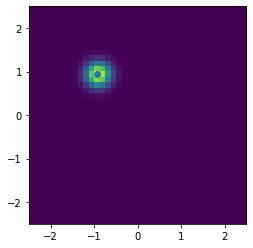

In [7]:
plt.imshow( store[1][0]['image'], **imkwargs )
plt.scatter(*store[1][1][:-1])